In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.interpolate import interp1d

In [19]:
samples = [434, 614, 789, 968, 4325]
class_number = [20, 30, 40, 50, 300]
avg_samples = [samples[i]//class_number[i] for i in range(len(samples))]
avg_samples

[21, 20, 19, 19, 14]

In [13]:
acc_20w = pd.read_csv("D:\\Courses\\Pattern Recognition\\UB-CSE-555\\models\\st_gcn\\performance\\STGCN-20words-42joints-accuracy.csv")
print(f"Largest Test Accuracy for 20 Words: {acc_20w['Test Accuracy'].max():.3f}")


Largest Test Accuracy for 20 Words: 0.662


In [14]:
acc_30w = pd.read_csv("D:\\Courses\\Pattern Recognition\\UB-CSE-555\\models\\st_gcn\\performance\\STGCN-30words-42joints-accuracy.csv")
print(f"Largest Test Accuracy for 30 words: {acc_30w['Test Accuracy'].max():.3f}")

Largest Test Accuracy for 30 words: 0.558


In [16]:
acc_40w = pd.read_csv("D:\\Courses\\Pattern Recognition\\UB-CSE-555\\models\\st_gcn\\performance\\STGCN-40words-42joints-accuracy.csv")
print(f"Largest Test Accuracy for 40 words: {acc_40w['Test Accuracy'].max():.3f}")

Largest Test Accuracy for 40 words: 0.542


In [17]:
acc_50w = pd.read_csv("D:\\Courses\\Pattern Recognition\\UB-CSE-555\\models\\st_gcn\\performance\\STGCN-50words-42joints-accuracy.csv")
print(f"Largest Test Accuracy for 50 words: {acc_50w['Test Accuracy'].max():.3f}")

Largest Test Accuracy for 50 words: 0.521


In [18]:
acc_300w = pd.read_csv("D:\\Courses\\Pattern Recognition\\UB-CSE-555\\models\\st_gcn\\performance\\STGCN-300words-42joints-accuracy.csv")
print(f"Largest Test Accuracy for 300 words: {acc_300w['Test Accuracy'].max():.3f}")

Largest Test Accuracy for 300 words: 0.300


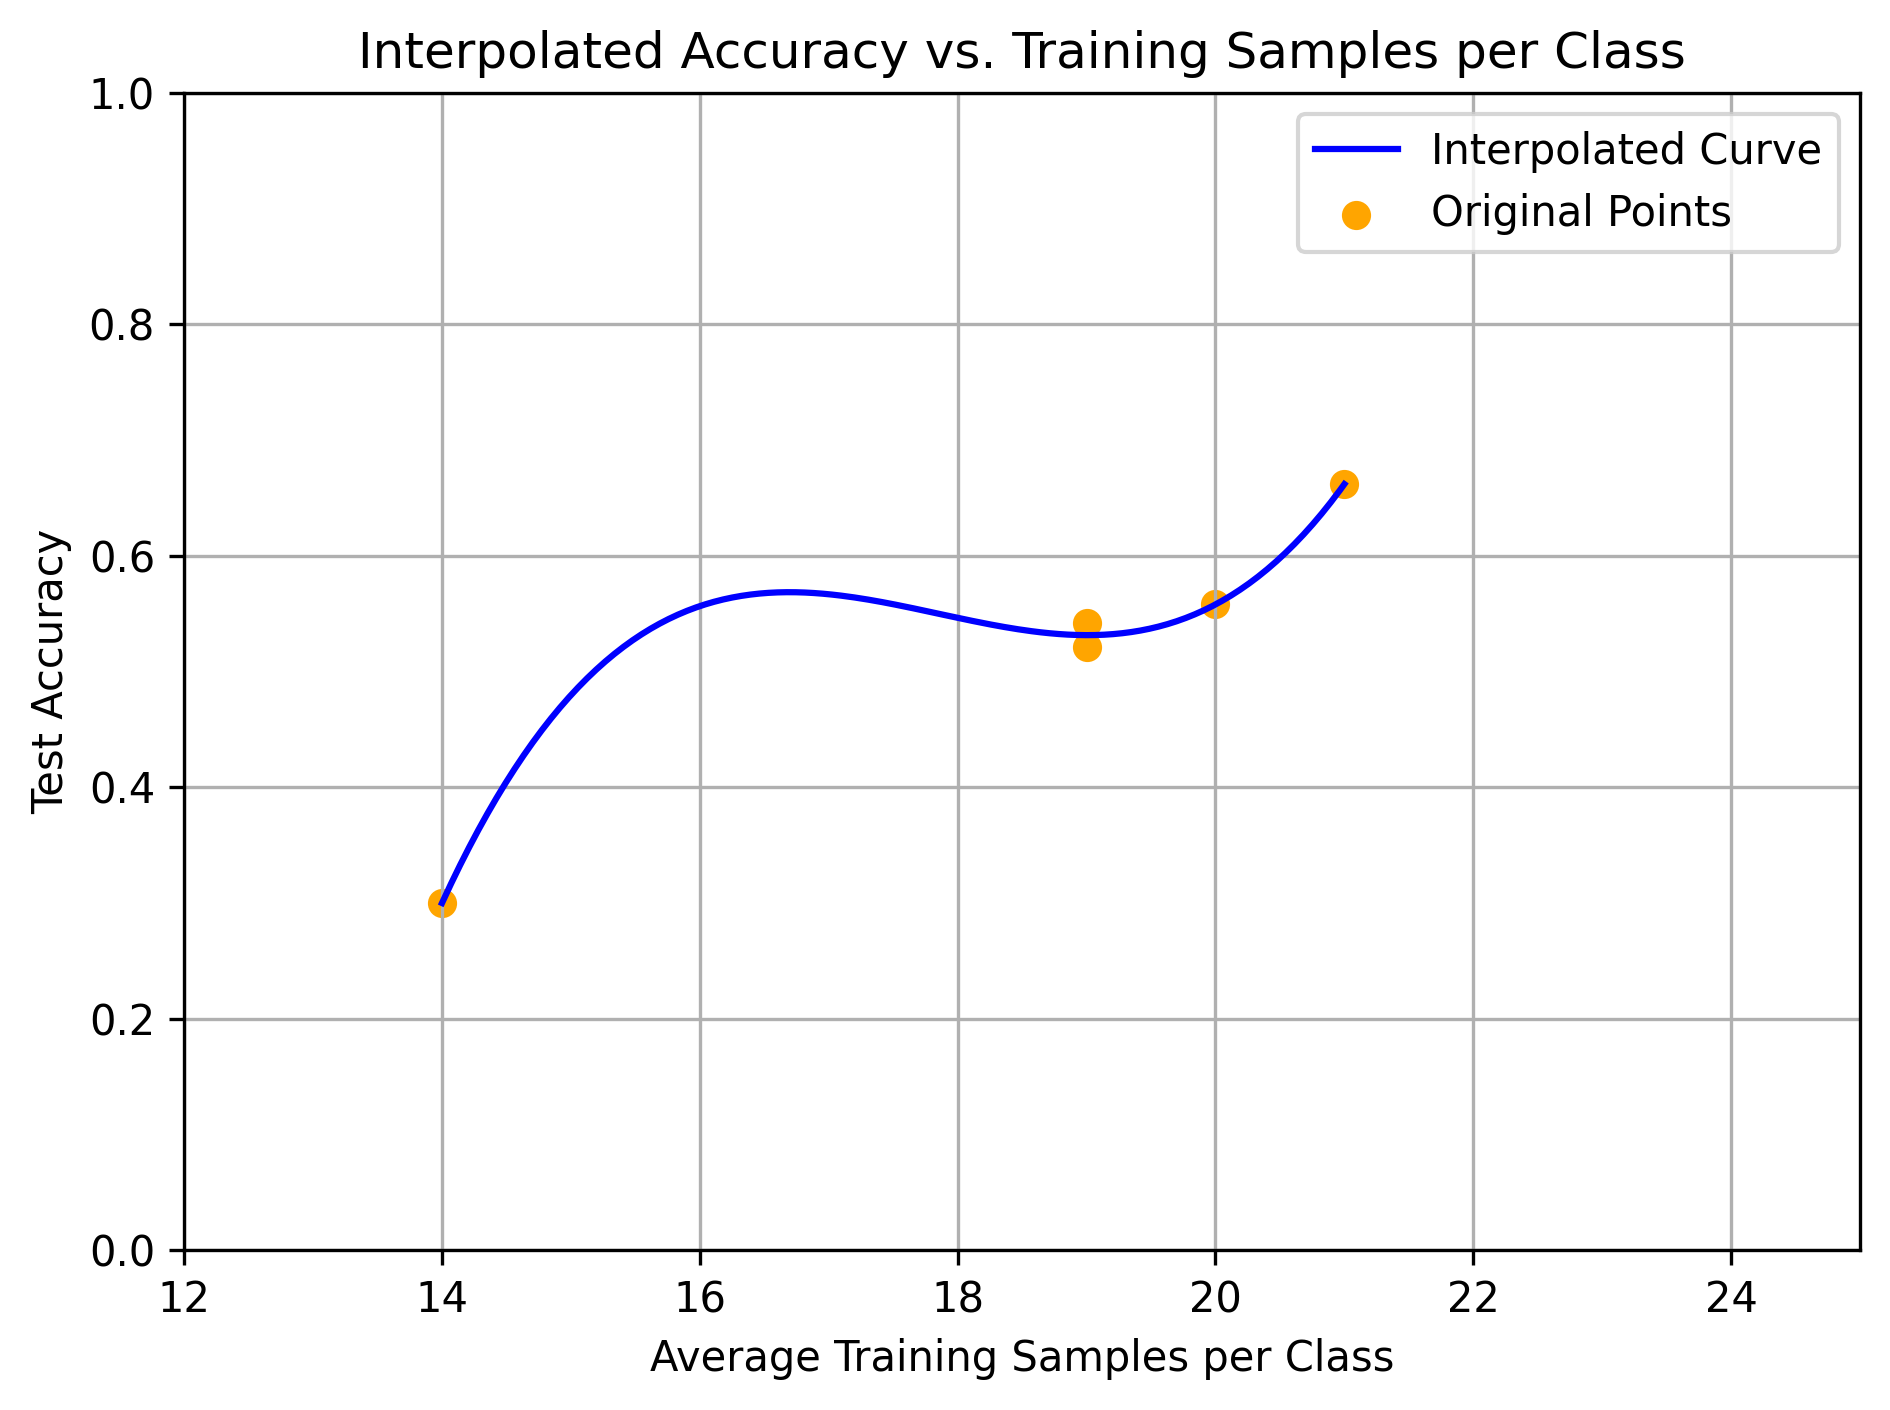

Estimated x where accuracy reaches 0.7: 21.00


In [5]:

# acc_list = [
#     acc_20w['Test Accuracy'].max(),
#     acc_30w['Test Accuracy'].max(),
#     acc_40w['Test Accuracy'].max(),
#     acc_50w['Test Accuracy'].max(),
#     acc_300w['Test Accuracy'].max()
# ]

acc_list = [0.662, 0.558, 0.542, 0.521, 0.300]
avg_samples = [21, 20, 19, 19, 14]


value_map = defaultdict(list)
for x, y in zip(avg_samples, acc_list):
    value_map[x].append(y)

x_unique = np.array(sorted(value_map.keys()))
y_unique = np.array([np.mean(value_map[k]) for k in x_unique])

# Interpolation
interp_func = interp1d(x_unique, y_unique, kind='cubic', fill_value="extrapolate")
x_interp = np.linspace(min(x_unique), max(x_unique), 200)
y_interp = interp_func(x_interp)

# Plot
plt.figure(dpi=300)
plt.plot(x_interp, y_interp, '-', color='blue', label='Interpolated Curve')
# plt.scatter(x_unique, y_unique, color='orange', label='Original Points')
plt.scatter(avg_samples, acc_list, color='orange', label='Original Points')

plt.xlabel("Average Training Samples per Class")
plt.ylabel("Test Accuracy")
plt.ylim([0, 1])
plt.xlim([12, 25])
plt.title("Interpolated Accuracy vs. Training Samples per Class")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Interpolation
x_vals = np.array(avg_samples)
y_vals = np.array(acc_list)
x_at_07 = np.interp(0.7, y_vals[::-1], x_vals[::-1])  # reverse to ensure increasing y

print(f"Estimated x where accuracy reaches 0.7: {x_at_07:.2f}")
